<a href="https://colab.research.google.com/github/erenofc28/Whine-Quality/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report , accuracy_score

In [ ]:
df = pd.read_csv("/content/winequality-red.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df["quality"].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.shape

(1599, 12)

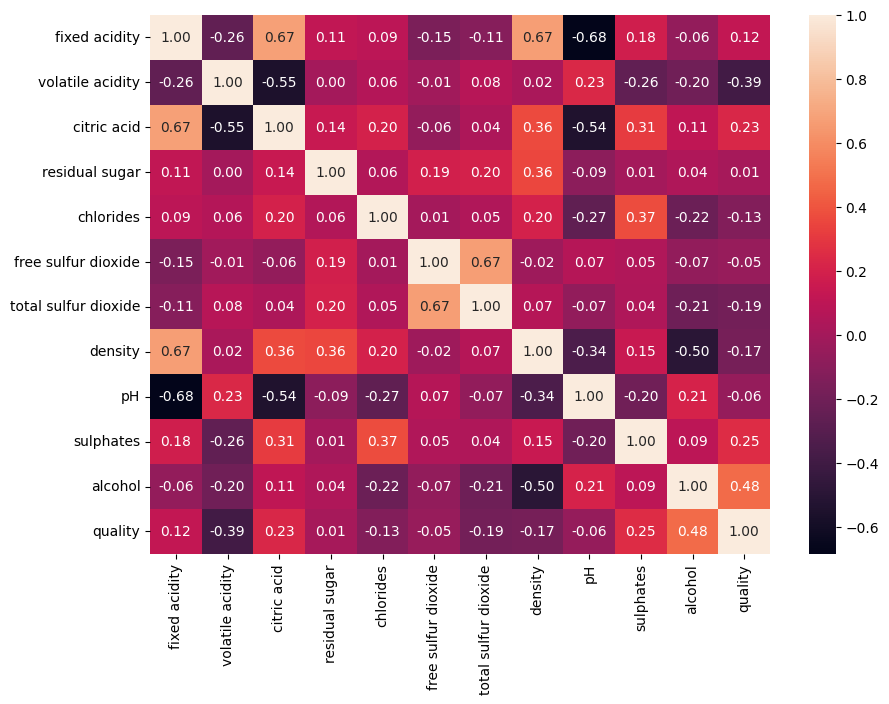

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='quality', ylabel='chlorides'>

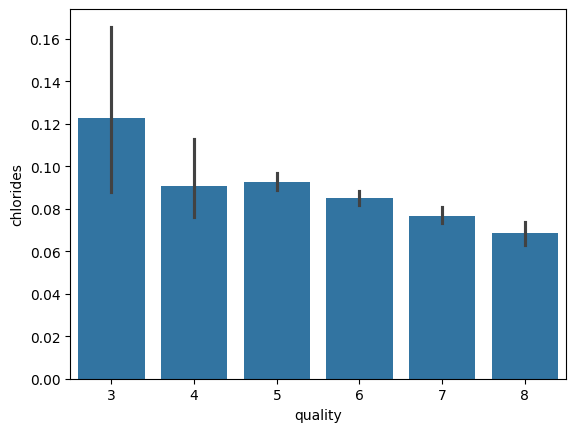

In [ ]:
sns.barplot(x = "quality" , y = "chlorides" , data = df )

<Axes: xlabel='quality', ylabel='pH'>

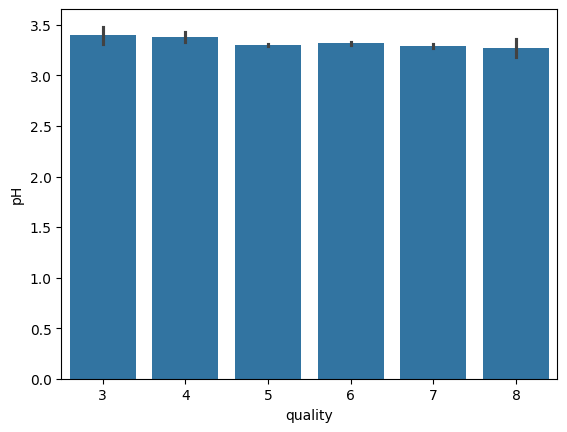

In [ ]:
sns.barplot(x = "quality" , y = "pH" , data = df )

<Axes: xlabel='quality', ylabel='citric acid'>

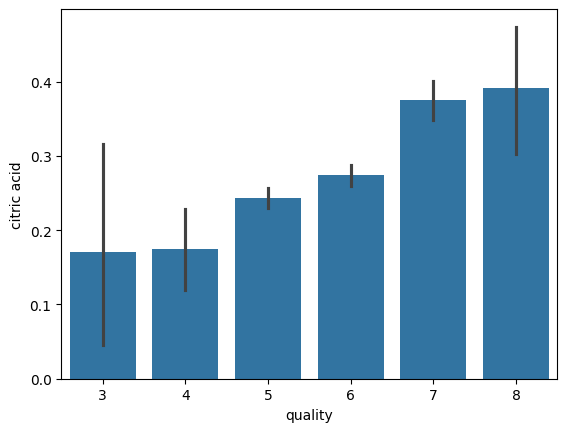

In [ ]:
sns.barplot(x = "quality" , y = "citric acid" , data = df )

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = df.drop(columns = ["quality"])
y = df["quality"].apply(lambda x: 1 if x >= 7 else 0)

In [ ]:
y.head()

,quality
0,0
1,0
2,0
3,0
4,0


In [ ]:
y.unique()

array([0, 1])

In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


<Axes: xlabel='quality', ylabel='count'>

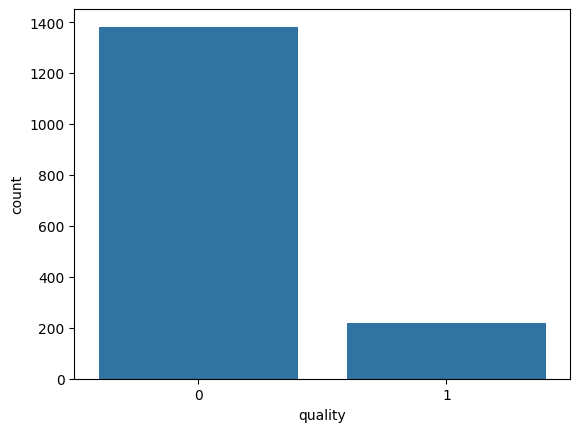

In [ ]:
sns.countplot(x = y)

In [ ]:
smote = SMOTE()
X , y = smote.fit_resample(X,y)

<Axes: xlabel='quality', ylabel='count'>

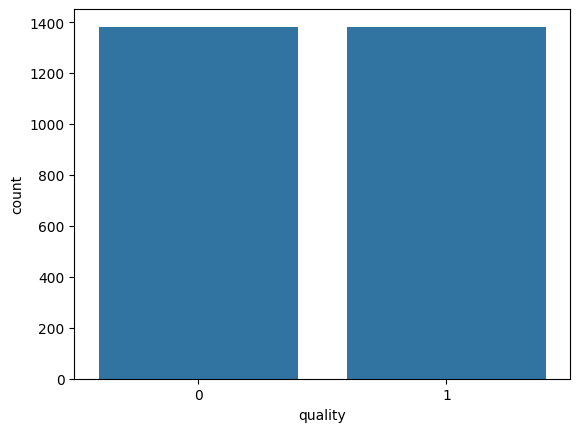

In [ ]:
sns.countplot(x = y)

In [ ]:
x_train , x_test , y_train , y_test = sklearn.model_selection.train_test_split(X,y,stratify=y,train_size = 0.8,random_state=5)

In [ ]:
models = {
    "logistic":sklearn.linear_model.LogisticRegression(),
    "randomForest":sklearn.ensemble.RandomForestClassifier(),
    "svm":sklearn.svm.SVC(),
    "decisionTree":sklearn.tree.DecisionTreeClassifier()
}
models_res = {}

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
for model_name , model in models.items():
  scores = sklearn.model_selection.cross_val_score(model , x_train , y_train , cv = 5)
  models_res[model_name] = [float(scores.mean()) , float(np.std(scores))]

In [ ]:
for model , scores in models_res.items():
  print(model, " : "," score : ",scores[0],"std dev : ",scores[1])

logistic  :   score :  0.8154693931748772 std dev :  0.012584697095096698
randomForest  :   score :  0.932156317988213 std dev :  0.01127297963380347
svm  :   score :  0.8697394359723398 std dev :  0.010507968638754146
decisionTree  :   score :  0.8765257448699224 std dev :  0.01058079573570503


In [ ]:
params = {
    "n_estimators":[100,200,250,150],
    "max_depth":[3,4,2],
    "min_samples_split":[3,4,5,2],
    "min_samples_leaf":[2,4,3],
    "criterion":["gini","entropy"]

}

In [ ]:
model = models["randomForest"]

In [ ]:
randomsearch = sklearn.model_selection.RandomizedSearchCV(model , params , n_iter = 10 , cv = 5,scoring = "accuracy")

In [ ]:
randomsearch.fit(x_train , y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 2],
                                        'min_samples_leaf': [2, 4, 3],
                                        'min_samples_split': [3, 4, 5, 2],
                                        'n_estimators': [100, 200, 250, 150]},
                   scoring='accuracy')

In [ ]:
best_params = randomsearch.best_params_
best_score = randomsearch.best_score_

In [ ]:
print("best score : ",best_score)
print("best params : ",best_params)

best score :  0.8548144592096258
best params :  {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 4, 'criterion': 'gini'}


In [ ]:
model = sklearn.ensemble.RandomForestClassifier(**best_params)

In [ ]:
model.fit(x_train , y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=150)

In [ ]:
pred = model.predict(x_train)
print("train score : ",accuracy_score(y_train , pred))
print(classification_report(y_train  , pred))

train score :  0.8715513342379014
              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1106
           1       0.83      0.93      0.88      1105

    accuracy                           0.87      2211
   macro avg       0.88      0.87      0.87      2211
weighted avg       0.88      0.87      0.87      2211



In [ ]:
pred = model.predict(x_test)
print("test score : ",accuracy_score(y_test , pred))
print(classification_report(y_test  , pred))

test score :  0.864376130198915
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       276
           1       0.82      0.93      0.87       277

    accuracy                           0.86       553
   macro avg       0.87      0.86      0.86       553
weighted avg       0.87      0.86      0.86       553

